<a href="https://colab.research.google.com/github/DEEPIKA-006/Deep-Learning_Cat-VS-Dog/blob/main/Cat_versus_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2024-08-30 02:02:03--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.43.246.19, 2600:1408:ec00:889::317f, 2600:1408:ec00:887::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.43.246.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M  63.6MB/s    in 9.1s    

2024-08-30 02:02:13 (86.4 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import os
from keras.preprocessing.image import load_img

In [ ]:
input_path=[]
label=[]
for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
       label.append(0)
    else:
       label.append(1)
    input_path.append(os.path.join("PetImages",class_name,path))
print(input_path[0],label[0])

PetImages/Cat/10220.jpg 0


In [ ]:
len(input_path)

25002

In [ ]:
df = pd.DataFrame() # Create an instance of a DataFrame
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Cat/1561.jpg,0
1,PetImages/Cat/11922.jpg,0
2,PetImages/Cat/4528.jpg,0
3,PetImages/Cat/3396.jpg,0
4,PetImages/Cat/10160.jpg,0


In [ ]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l=[]
for image in df['images']:
  try:
    img=PIL.Image.open(image)
  except:
     l.append(image)

l


['PetImages/Dog/Thumbs.db',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg']

In [ ]:
 df = df[df['images']!='PetImages/Dog/Thumbs.db']
 df = df[df['images']!='PetImages/Cat/Thumbs.db']
 df = df[df['images']!='PetImages/Cat/666.jpg']
 df = df[df['images']!='PetImages/Dog/11702.jpg']
 len(df)

24998

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title("Dogs")
  plt.axis("off")

In [ ]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0,len(temp))
files = temp[start:start+25]
for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img=load_img(file)
  img=np.array(img)
  plt.imshow(img)
  plt.title("Cats")
  plt.axis("off")

In [ ]:
df['label']=df['label'].astype('str')

In [ ]:
df.head()

,images,label
0,PetImages/Cat/1561.jpg,0
1,PetImages/Cat/11922.jpg,0
2,PetImages/Cat/4528.jpg,0
3,PetImages/Cat/3396.jpg,0
4,PetImages/Cat/10160.jpg,0


<Axes: xlabel='count', ylabel='label'>

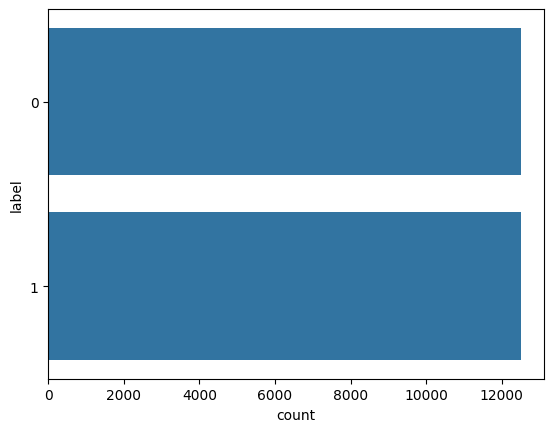

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
#input split
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2,random_state=42)

In [ ]:
train.head()

,images,label
23290,PetImages/Cat/10266.jpg,0
17782,PetImages/Cat/800.jpg,0
1020,PetImages/Cat/7504.jpg,0
12645,PetImages/Cat/1575.jpg,0
1533,PetImages/Dog/2196.jpg,1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator=ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, # Correct indentation here
    fill_mode='nearest'
)
val_generator=ImageDataGenerator(rescale=1./255)

train_iterator=train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)
val_iterator=val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
model=Sequential([
                  Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
                  MaxPool2D((2,2)),
                  Conv2D(32,(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D((2,2)),
                  Flatten(),
                  Dense(512,activation='relu'),
                  Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,447,137 (24.59 MB)

 Trainable params: 6,447,137 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(train_iterator,epochs=10,validation_data=val_iterator)

Epoch 1/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 493s 12s/step - accuracy: 0.5146 - loss: 0.9597 - val_accuracy: 0.5922 - val_loss: 0.6825
Epoch 2/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 483s 11s/step - accuracy: 0.6341 - loss: 0.6461 - val_accuracy: 0.6514 - val_loss: 0.6422
Epoch 3/3
40/40 ━━━━━━━━━━━━━━━━━━━━ 502s 12s/step - accuracy: 0.6779 - loss: 0.6040 - val_accuracy: 0.7228 - val_loss: 0.5466


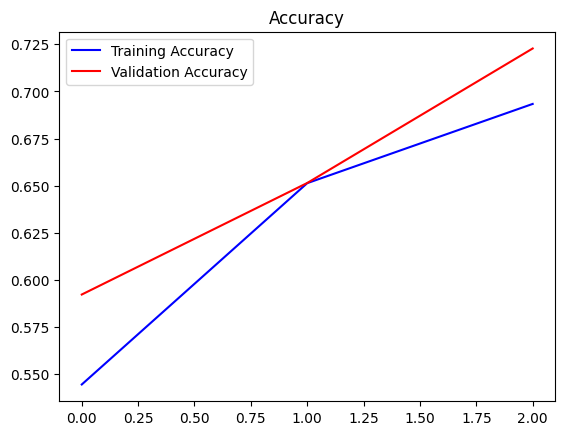

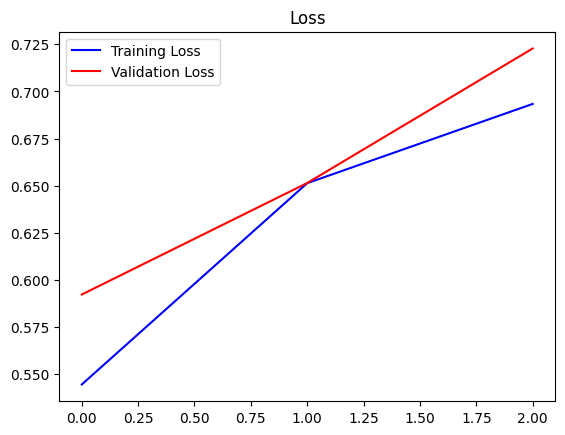

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,acc,'b',label='Training Loss')
plt.plot(epochs,val_acc,'r',label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Dog


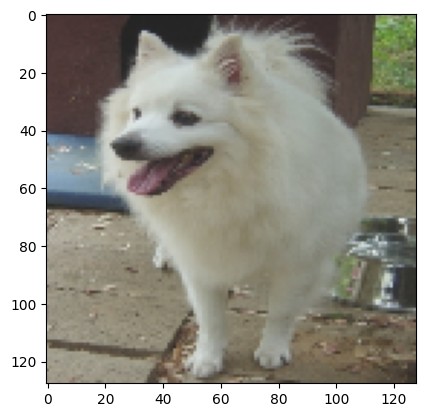

In [ ]:
from tensorflow.keras.preprocessing import image

#Input image
test_image = image.load_img('PetImages/Dog/6535.jpg',target_size=(128,128))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
 print("Dog")
else:
 print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Cat


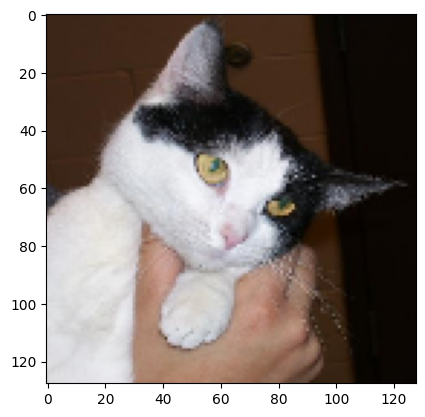

In [ ]:
from tensorflow.keras.preprocessing import image

#Input image
test_image = image.load_img('PetImages/Cat/4528.jpg',target_size=(128,128))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
 print("Dog")
else:
 print("Cat")